**LATIHAN Algortima K-NN [Senin, 27 Sept 2021]**

# **IRIS**

In [1]:
# Import library
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Import dataset
!wget -O iris.csv https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv

--2021-09-28 15:38:22--  https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4761 (4.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.65K  --.-KB/s    in 0s      

2021-09-28 15:38:22 (33.7 MB/s) - ‘iris.csv’ saved [4761/4761]



In [3]:
# Load dataset
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Visualisasi data
df['Label'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5621e25910>]],
      dtype=object)

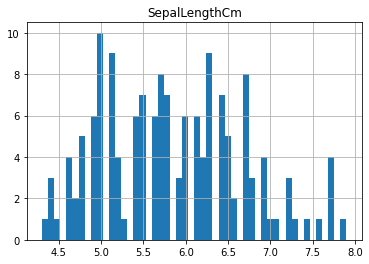

In [5]:
df.hist(column='SepalLengthCm', bins=50)

In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Label'],
      dtype='object')

In [7]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] .values  #.astype(float)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
y = df['Label'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


# **Klasifikasi k-NN**

In [11]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

In [12]:
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [13]:
yhat = knn.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


In [15]:
# Mencari nilai k terbaik
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

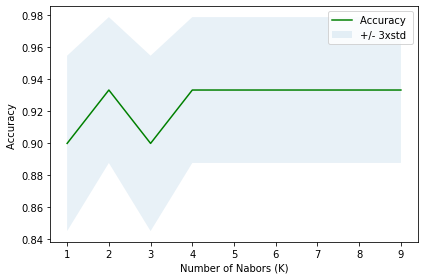

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9333333333333333 with k= 2


# **Wheat Seeds**

Wheat Seeds Dataset
 : https://raw.githubusercontent.com/siiddd/WheatSeeds/master/Wheat.csv

In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [19]:
# Panggil dataset
!wget -O Wheat_Seeds.csv https://raw.githubusercontent.com/siiddd/WheatSeeds/master/Wheat.csv

--2021-09-28 15:38:23--  https://raw.githubusercontent.com/siiddd/WheatSeeds/master/Wheat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9610 (9.4K) [text/plain]
Saving to: ‘Wheat_Seeds.csv’

Wheat_Seeds.csv     100%[===================>]   9.38K  --.-KB/s    in 0s      

2021-09-28 15:38:23 (61.3 MB/s) - ‘Wheat_Seeds.csv’ saved [9610/9610]



In [20]:
# Load dataset
data = pd.read_csv('Wheat_Seeds.csv')
data.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetric Coeff.,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [21]:
# Visualisasi data
data['Class'].value_counts()

3    70
2    70
1    70
Name: Class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56096f0110>]],
      dtype=object)

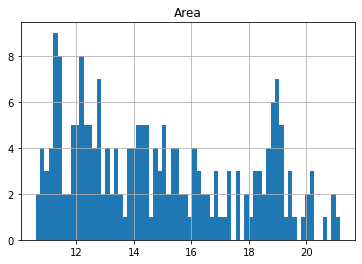

In [22]:
data.hist(column='Area', bins=70)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56016552d0>]],
      dtype=object)

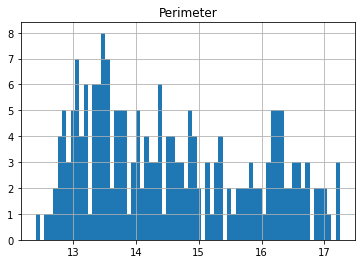

In [23]:
data.hist(column='Perimeter', bins=70)

In [24]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of Kernel',
       'Width of Kernel', 'Asymmetric Coeff.', 'Length of Kernel Groove',
       'Class'],
      dtype='object')

In [25]:
a = data[['Area', 'Perimeter', 'Compactness', 'Length of Kernel',
       'Width of Kernel', 'Asymmetric Coeff.', 'Length of Kernel Groove']] .values  #.astype(float)
a[0:8]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ]])

In [26]:
b = data['Class'].values
b[0:8]

array([1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
a=preprocessing.StandardScaler().fit(a).transform(a.astype(float))
a[0:8]

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05,
         3.04218199e-01,  1.41701823e-01, -9.86151745e-01,
        -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01,
        -1.68624664e-01,  1.97432229e-01, -1.78816620e+00,
        -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00,
        -7.63637453e-01,  2.08047544e-01, -6.67479334e-01,
        -1.18919199e+00],
       [-3.47091272e-01, -4.75333162e-01,  1.03938133e+00,
        -6.88978054e-01,  3.19508356e-01, -9.60817955e-01,
        -1.22998260e+00],
       [ 4.45257175e-01,  3.30595037e-01,  1.37450924e+00,
         6.66655647e-02,  8.05159035e-01, -1.56349549e+00,
        -4.75356297e-01],
       [-1.61061637e-01, -2.68094482e-01,  1.02241283e+00,
        -5.48708879e-01,  1.41701823e-01, -8.25482182e-01,
        -9.22013487e-01],
       [-5.42668460e-02, -5.31802961e-02,  3.77609765e-01,
        -1.48263009e-01,  1.04889426e-03, -7.61353407e-02,
        -3.8561695

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( a, b, test_size=0.2, random_state=4)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (168, 7) (168,)
Test set: (42, 7) (42,)


In [29]:
# Import library

from sklearn.neighbors import KNeighborsClassifier

In [30]:
k = 3
#Train Model and Predict  
k_nn = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
k_nn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
what = k_nn.predict(xtest)
what[0:8]

array([1, 3, 2, 1, 2, 1, 2, 3])

In [32]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, k_nn.predict(xtrain)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, what))

Train set Accuracy:  0.9642857142857143
Test set Accuracy:  0.9523809523809523


In [33]:
# Mencari nilai k terbaik
Kbest = 10
mean_accuracy = np.zeros((Kbest-1))
std_accuracy = np.zeros((Kbest-1))
ConfustionMatrix = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain,ytrain)
    what=neigh.predict(xtest)
    mean_accuracy[n-1] = metrics.accuracy_score(ytest, what)

    
    std_accuracy[n-1]=np.std(what==ytest)/np.sqrt(what.shape[0])

mean_accuracy

array([0.97619048, 0.95238095, 0.95238095, 0.97619048, 0.97619048,
       0.97619048, 0.97619048, 0.97619048, 0.97619048])

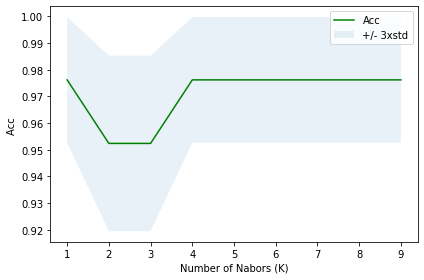

In [34]:
plt.plot(range(1,Kbest),mean_accuracy,'g')
plt.fill_between(range(1,Kbest),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Acc', '+/- 3xstd'))
plt.ylabel('Acc ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [35]:
print( "The best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1)

The best accuracy was with 0.9761904761904762 with k= 1
